# Regresja

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import cross_val_predict
from sklearn import datasets, linear_model
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn import model_selection
from sklearn import  metrics

In [2]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

Rozważmy zbiór Boston

In [3]:
boston = datasets.load_boston()
# print description
print(boston.DESCR)

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

In [4]:
# get the data
x = boston.data
y = boston.target

In [5]:
df = pd.DataFrame(x)

In [6]:
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [7]:
boston.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], 
      dtype='<U7')

In [8]:
boston.data.shape

(506, 13)

In [9]:
df.columns = boston.feature_names

In [10]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [11]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.593761,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063
std,8.596783,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000
75%,3.647423,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


In [12]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
CRIM       506 non-null float64
ZN         506 non-null float64
INDUS      506 non-null float64
CHAS       506 non-null float64
NOX        506 non-null float64
RM         506 non-null float64
AGE        506 non-null float64
DIS        506 non-null float64
RAD        506 non-null float64
TAX        506 non-null float64
PTRATIO    506 non-null float64
B          506 non-null float64
LSTAT      506 non-null float64
dtypes: float64(13)
memory usage: 51.5 KB


In [14]:
%matplotlib inline

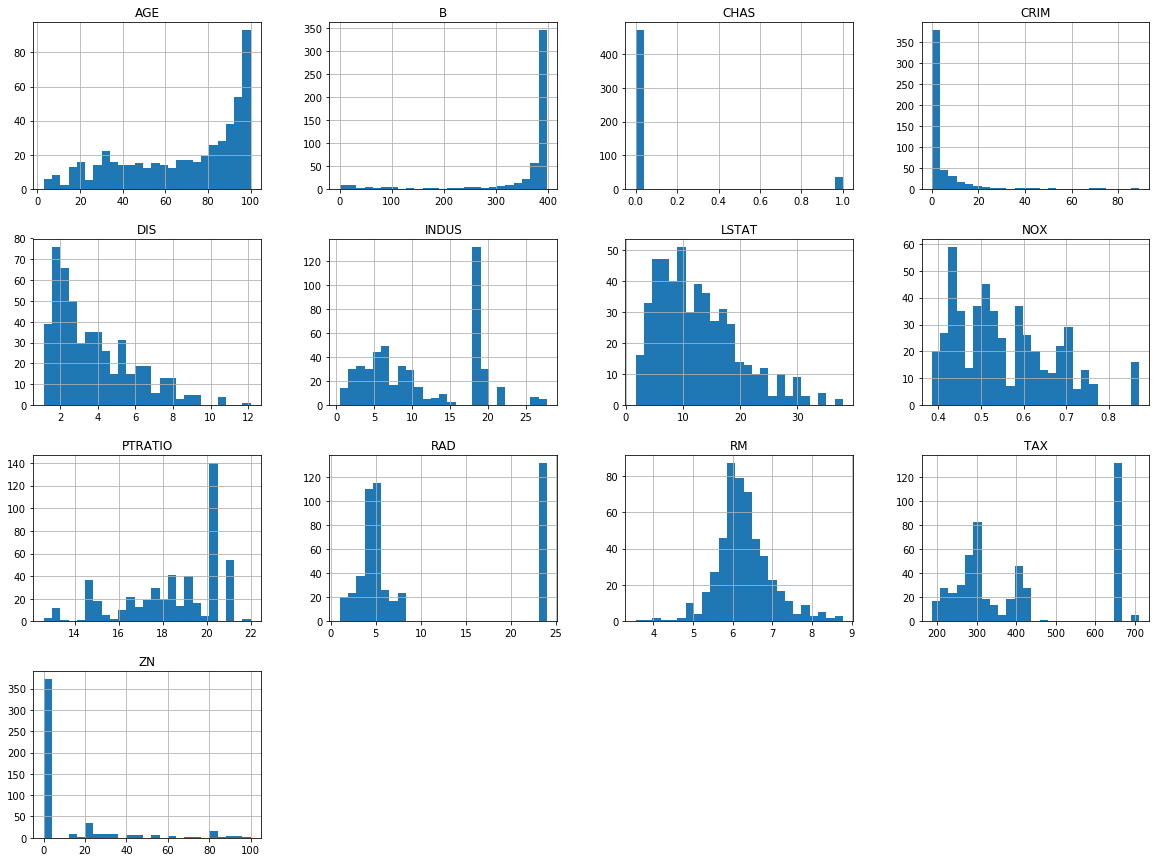

In [15]:
df.hist(bins=25,figsize=(20,15));

## Add log columns with CRIM and DIS

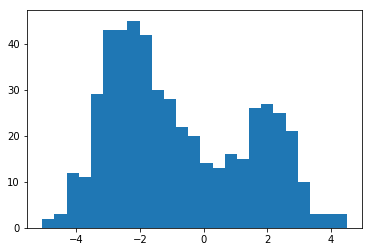

In [16]:
plt.hist(np.log(df["CRIM"]),bins=25);

In [17]:
df["LOG_CRIM"] = np.log(df["CRIM"])

In [18]:
df["LOG_DIS"] = np.log(df["DIS"])

## One hot encoding of CHAS column

In [19]:
onehot = OneHotEncoder()

In [20]:
chas = df["CHAS"]

In [21]:
chas_onehot = onehot.fit_transform(df["CHAS"].values.reshape(-1,1))

In [22]:
chas_onehot

<506x2 sparse matrix of type '<class 'numpy.float64'>'
	with 506 stored elements in Compressed Sparse Row format>

In [23]:
chas_df = pd.DataFrame(chas_onehot.toarray())

In [24]:
chas_df.columns = ["CHAS_0","CHAS_1"]

In [25]:
df = df.join(chas_df)

In [26]:
df = df.drop("CHAS",axis=1)

## Add response column with PRICE

In [27]:
df["PRICE"] = boston.target

In [29]:
df.head()

,CRIM,ZN,INDUS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,LOG_CRIM,LOG_DIS,CHAS_0,CHAS_1,PRICE
0,0.00632,18.0,2.31,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,-5.064036,1.408545,1.0,0.0,24.0
1,0.02731,0.0,7.07,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,-3.600502,1.602836,1.0,0.0,21.6
2,0.02729,0.0,7.07,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,-3.601235,1.602836,1.0,0.0,34.7
3,0.03237,0.0,2.18,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,-3.430523,1.802073,1.0,0.0,33.4
4,0.06905,0.0,2.18,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,-2.672924,1.802073,1.0,0.0,36.2


In [30]:
df_corr = df.corr()

In [31]:
df_corr["PRICE"].sort_values(ascending=False)

PRICE       1.000000
RM          0.695360
ZN          0.360445
B           0.333461
LOG_DIS     0.292316
DIS         0.249929
CHAS_1      0.175260
CHAS_0     -0.175260
AGE        -0.376955
RAD        -0.381626
CRIM       -0.385832
NOX        -0.427321
LOG_CRIM   -0.452284
TAX        -0.468536
INDUS      -0.483725
PTRATIO    -0.507787
LSTAT      -0.737663
Name: PRICE, dtype: float64

In [32]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [33]:
X.shape

(506, 16)

In [34]:
y.shape

(506,)

## Split on train and test data

In [35]:
X_train,X_test, y_train,y_test = model_selection.train_test_split(X,y,test_size=0.2)

In [36]:
X_train.shape

(404, 16)

In [37]:
X_test.shape

(102, 16)

In [38]:
kfold = model_selection.KFold(n_splits=5,shuffle=True)

## Linear and polynomial regression

In [39]:
grid_lm = GridSearchCV(make_pipeline(PolynomialFeatures(degree=1), linear_model.LinearRegression()),
                    param_grid={'polynomialfeatures__degree': [1, 2, 3]},
                    cv=kfold,
                    refit=True)
#make_pipeline(PolynomialFeatures(degree=2), linear_model.Ridge()).get_params().keys()
grid_lm.fit(X_train, y_train)
print(grid_lm.best_params_)
print(grid_lm.best_score_)

{'polynomialfeatures__degree': 1}
0.721019087056


## Lasso regression

In [40]:
grid_lasso = GridSearchCV(make_pipeline(PolynomialFeatures(degree=1),linear_model.Lasso(alpha=0.1,normalize=True),),
                         param_grid = {'polynomialfeatures__degree':[1,2,3],
                                      'lasso__alpha': [0.1,0.5,1.0,]},
                         cv=kfold,
                         refit=True)
grid_lasso.fit(X_train,y_train)
print(grid_lasso.best_params_)
print(grid_lasso.best_score_)

{'lasso__alpha': 0.1, 'polynomialfeatures__degree': 3}
0.67920134423


In [41]:
grid_lasso.grid_scores_

/home/kodolamacz/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_search.py:667: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


[mean: 0.59566, std: 0.07300, params: {'lasso__alpha': 0.1, 'polynomialfeatures__degree': 1},
 mean: 0.65196, std: 0.08550, params: {'lasso__alpha': 0.1, 'polynomialfeatures__degree': 2},
 mean: 0.67920, std: 0.08979, params: {'lasso__alpha': 0.1, 'polynomialfeatures__degree': 3},
 mean: -0.01385, std: 0.01521, params: {'lasso__alpha': 0.5, 'polynomialfeatures__degree': 1},
 mean: -0.01385, std: 0.01521, params: {'lasso__alpha': 0.5, 'polynomialfeatures__degree': 2},
 mean: -0.01385, std: 0.01521, params: {'lasso__alpha': 0.5, 'polynomialfeatures__degree': 3},
 mean: -0.01385, std: 0.01521, params: {'lasso__alpha': 1.0, 'polynomialfeatures__degree': 1},
 mean: -0.01385, std: 0.01521, params: {'lasso__alpha': 1.0, 'polynomialfeatures__degree': 2},
 mean: -0.01385, std: 0.01521, params: {'lasso__alpha': 1.0, 'polynomialfeatures__degree': 3}]

 ## Ridge regression

In [42]:
grid_ridge = GridSearchCV(make_pipeline(PolynomialFeatures(degree=1),linear_model.Ridge(alpha=0.1,normalize=True)),
                         param_grid={'polynomialfeatures__degree': [1,2],
                                    'ridge__alpha': [0.1,1.0,2.0,5.0]},
                         cv=kfold,
                         refit=True)
grid_ridge.fit(X_train,y_train)
print(grid_ridge.best_params_)
print(grid_ridge.best_score_)

{'polynomialfeatures__degree': 2, 'ridge__alpha': 0.1}
0.806204966936


In [43]:
grid_ridge.grid_scores_

/home/kodolamacz/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_search.py:667: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


[mean: 0.72186, std: 0.05916, params: {'polynomialfeatures__degree': 1, 'ridge__alpha': 0.1},
 mean: 0.61711, std: 0.05075, params: {'polynomialfeatures__degree': 1, 'ridge__alpha': 1.0},
 mean: 0.53669, std: 0.04201, params: {'polynomialfeatures__degree': 1, 'ridge__alpha': 2.0},
 mean: 0.40137, std: 0.02989, params: {'polynomialfeatures__degree': 1, 'ridge__alpha': 5.0},
 mean: 0.80620, std: 0.05941, params: {'polynomialfeatures__degree': 2, 'ridge__alpha': 0.1},
 mean: 0.72908, std: 0.05866, params: {'polynomialfeatures__degree': 2, 'ridge__alpha': 1.0},
 mean: 0.69826, std: 0.05477, params: {'polynomialfeatures__degree': 2, 'ridge__alpha': 2.0},
 mean: 0.63373, std: 0.04670, params: {'polynomialfeatures__degree': 2, 'ridge__alpha': 5.0}]

## Elastic Net regression

In [44]:
grid_elastic_net = GridSearchCV(make_pipeline(PolynomialFeatures(degree=1),linear_model.ElasticNet(alpha=0.1,normalize=True)),
                         param_grid={'polynomialfeatures__degree': [1,2],
                                    'elasticnet__alpha': [0.1,1.0]},
                         cv=kfold,
                         refit=True)
grid_elastic_net.fit(X_train,y_train)
print(grid_elastic_net.best_params_)
print(grid_elastic_net.best_score_)

{'elasticnet__alpha': 0.1, 'polynomialfeatures__degree': 2}
0.411401997486


## Random Forest Regressor

In [45]:
forest = RandomForestRegressor()
param_grid=[{'n_estimators':[3,10,30],'max_features':[4,6,8,10]},
            {'bootstrap':[False],'n_estimators':[3,10],'max_features':[4,6,8,10]}]

In [46]:
forest.get_params().keys()

dict_keys(['bootstrap', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'min_impurity_split', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'n_estimators', 'n_jobs', 'oob_score', 'random_state', 'verbose', 'warm_start'])

In [47]:
grid_forest = GridSearchCV(forest,param_grid,cv=kfold)
grid_forest.fit(X_train,y_train)
print(grid_forest.best_params_)
print(grid_forest.best_score_)

{'bootstrap': False, 'max_features': 10, 'n_estimators': 10}
0.867482071367


In [48]:
grid_forest.best_estimator_.feature_importances_

array([  3.09226719e-02,   5.71915847e-04,   3.09785896e-02,
         3.61174958e-02,   5.52193765e-01,   1.22576742e-02,
         5.85063574e-02,   3.58325646e-03,   1.03100483e-02,
         1.54650753e-02,   8.41807631e-03,   1.90844951e-01,
         1.65084863e-02,   3.26945592e-02,   3.76721666e-04,
         2.50355419e-04])

In [49]:
sorted_features = sorted(zip(grid_forest.best_estimator_.feature_importances_,X_train.columns),reverse = True)
sorted_features

[(0.55219376529748732, 'RM'),
 (0.19084495108202656, 'LSTAT'),
 (0.058506357368889372, 'DIS'),
 (0.036117495813387517, 'NOX'),
 (0.03269455918476491, 'LOG_DIS'),
 (0.030978589557731605, 'INDUS'),
 (0.030922671919750306, 'CRIM'),
 (0.016508486263434579, 'LOG_CRIM'),
 (0.015465075300128802, 'PTRATIO'),
 (0.012257674248694353, 'AGE'),
 (0.010310048259468695, 'TAX'),
 (0.0084180763139548136, 'B'),
 (0.0035832564585772013, 'RAD'),
 (0.00057191584661475149, 'ZN'),
 (0.00037672166636328416, 'CHAS_0'),
 (0.00025035541872598527, 'CHAS_1')]

In [50]:
f12 = sorted_features[:12]
f12

[(0.55219376529748732, 'RM'),
 (0.19084495108202656, 'LSTAT'),
 (0.058506357368889372, 'DIS'),
 (0.036117495813387517, 'NOX'),
 (0.03269455918476491, 'LOG_DIS'),
 (0.030978589557731605, 'INDUS'),
 (0.030922671919750306, 'CRIM'),
 (0.016508486263434579, 'LOG_CRIM'),
 (0.015465075300128802, 'PTRATIO'),
 (0.012257674248694353, 'AGE'),
 (0.010310048259468695, 'TAX'),
 (0.0084180763139548136, 'B')]

In [51]:
columns_12 = [it[1]for it in f12]
X_train12 = X_train[columns_12]

In [52]:
columns_6 = [it[1] for it in f12]
X_train6 = X_train[columns_6]

In [53]:
grid_forest = GridSearchCV(forest,param_grid,cv=kfold)
grid_forest.fit(X_train12,y_train)
print(grid_forest.best_params_)
print(grid_forest.best_score_)

{'max_features': 4, 'n_estimators': 10}
0.836918679104


In [54]:
param_grid2=[{'n_estimators':[4,10,30],'max_features':[2,3,4,5]},
            {'bootstrap':[False],'n_estimators':[4,10,30],'max_features':[2,3,4,5]}]

In [55]:
grid_forest2 = GridSearchCV(forest,param_grid2,cv=kfold)
grid_forest2.fit(X_train6,y_train)
print(grid_forest2.best_params_)
print(grid_forest2.best_score_)


{'bootstrap': False, 'max_features': 4, 'n_estimators': 30}
0.876973658769


In [56]:
best_model = grid_forest2.best_estimator_
best_model

RandomForestRegressor(bootstrap=False, criterion='mse', max_depth=None,
           max_features=4, max_leaf_nodes=None, min_impurity_split=1e-07,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=30, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

## Selection of parameters according to Lasso path

In [63]:
scaler = StandardScaler()
X_train_a = scaler.fit_transform(X_train)

In [64]:
y_train_a = scaler.fit_transform(y_train.values.reshape(-1,1))

In [65]:
X_train_a.shape

(404, 16)

In [66]:
alphas, active, coefs = linear_model.lars_path(X_train_a, y_train_a.squeeze(), method='lasso', verbose=True)

.

In [67]:
print(alphas)
print(active)

[  7.30653383e-01   6.64023219e-01   3.26755835e-01   1.10703212e-01
   9.43687603e-02   6.76216160e-02   6.36700572e-02   4.51975303e-02
   3.73757498e-02   3.22960242e-02   2.37374527e-02   2.07617044e-02
   1.95303534e-02   1.74806775e-02   7.89455365e-03   1.09923072e-18]
[11, 4, 9, 10, 14, 13, 3, 0, 1, 2, 7, 8, 12, 5, 6]


In [68]:
df.columns[active]

Index(['LSTAT', 'RM', 'PTRATIO', 'B', 'CHAS_0', 'LOG_DIS', 'NOX', 'CRIM', 'ZN',
       'INDUS', 'RAD', 'TAX', 'LOG_CRIM', 'AGE', 'DIS'],
      dtype='object')

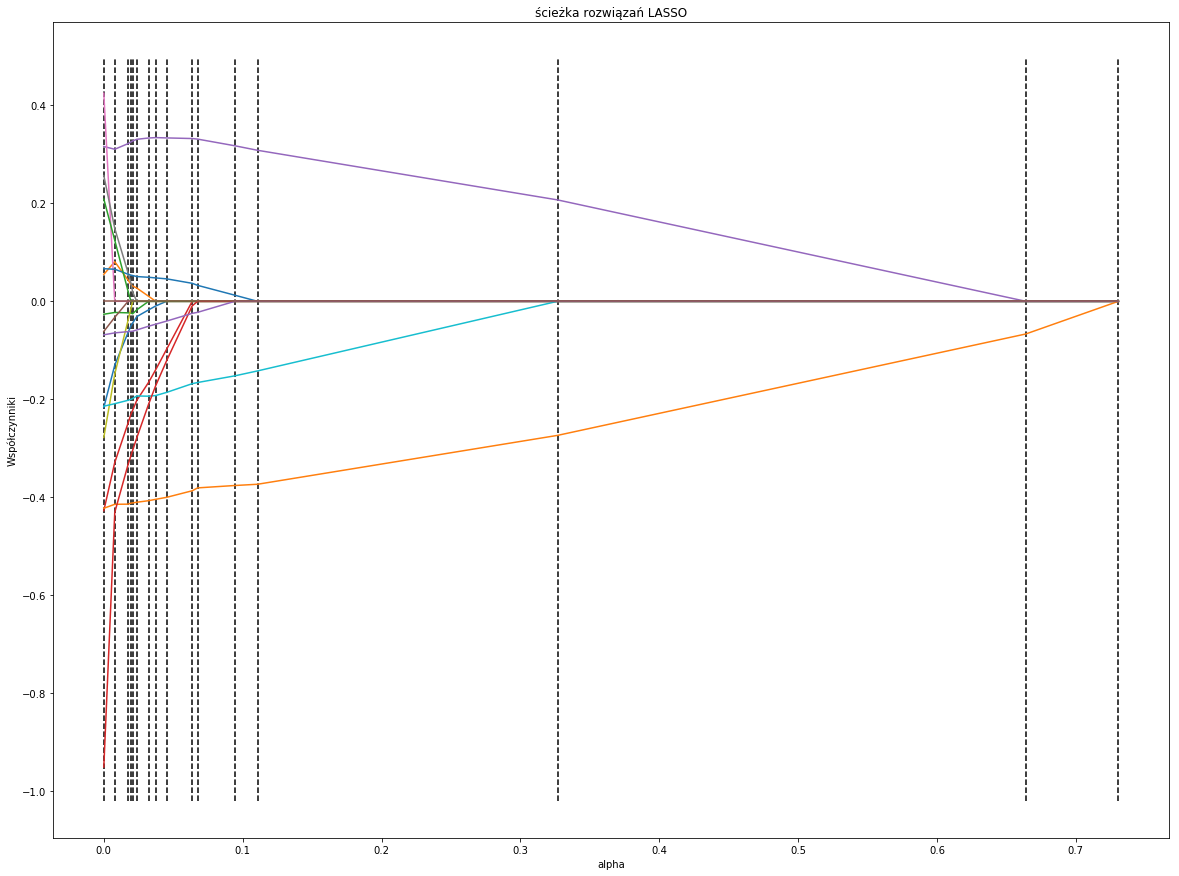

In [69]:
#x_plot = -np.log1p(alphas)
x_plot = alphas# / np.max(alphas)
plt.figure(figsize=(20,15))
plt.plot(x_plot, coefs.T)
ymin, ymax = plt.ylim()
plt.vlines(x_plot, ymin, ymax, linestyle='dashed')
plt.xlabel('alpha')
plt.ylabel('Współczynniki')
plt.title('ścieżka rozwiązań LASSO')
plt.show()

In [70]:
coefs[:,5]

array([ 0.        ,  0.        ,  0.        ,  0.        ,  0.33104241,
        0.        ,  0.        ,  0.        ,  0.        , -0.16569124,
        0.03254265, -0.3807776 ,  0.        ,  0.        , -0.02242714,  0.        ])

In [71]:
X_train6 = X_train.iloc[:,active[:6]]

In [72]:
model_linear = linear_model.LinearRegression()

In [73]:
model_selection.cross_val_score(model_linear,X_train6,y_train,cv=kfold)

array([ 0.62276797,  0.77274564,  0.61465725,  0.75721537,  0.61107506])

In [74]:
model_lin6 = model_linear.fit(X_train6,y_train)

## Best model Random Forest Regression according to 6 best features 

## Check result on test dataset

In [75]:
X_test6 = X_test[columns_6]

In [76]:
X_test6.head()

,RM,LSTAT,DIS,NOX,LOG_DIS,INDUS,CRIM,LOG_CRIM,PTRATIO,AGE,TAX,B
217,6.642,9.69,3.4211,0.550,1.229962,13.89,0.07013,-2.657405,16.4,85.1,276.0,392.78
194,6.604,4.38,6.2196,0.401,1.827706,2.93,0.01439,-4.241222,15.6,18.8,265.0,376.70
0,6.575,4.98,4.0900,0.538,1.408545,2.31,0.00632,-5.064036,15.3,65.2,296.0,396.90
442,6.219,16.59,2.0048,0.740,0.695544,18.10,5.66637,1.734549,20.2,100.0,666.0,395.69
22,6.142,18.72,3.9769,0.538,1.380503,8.14,1.23247,0.209020,21.0,91.7,307.0,396.90


In [77]:
best_model.get_params

<bound method BaseEstimator.get_params of RandomForestRegressor(bootstrap=False, criterion='mse', max_depth=None,
           max_features=4, max_leaf_nodes=None, min_impurity_split=1e-07,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=30, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)>

In [78]:
print(metrics.r2_score(y_test,best_model.predict(X_test6)))

0.886793845883


In [79]:
print(metrics.explained_variance_score(y_test,best_model.predict(X_test6)))

0.891469476949
